# Project : Titanic - Machine Learning from Disaster


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
train_df= pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Note
- sibsp: #of siblings / spouses aboard the Titanic
- parch	:# of parents / children aboard the Titanic
- ticket:	Ticket number
- cabin	:Cabin number

In [8]:
#preview data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_df.set_index(train_df.PassengerId, inplace = True)

In [10]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train_df.drop('PassengerId', axis= 1, inplace = True)

In [12]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
test_df= pd.read_csv("/content/test.csv", index_col="PassengerId")

In [14]:
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


- Categorical: Survived  , sex, Embarked, Pclass(ordinal), SibSp, Parch
- Numerical: (continuous) Age, Fare, (discrete)
- Mix type of data: Ticket, Cabin
- Contain Errol/Typo: Name
- Blank or Null: Cabin> Age  > Embarked  
- Various Date Type : String, Int, Float

In [17]:
train_df["Survived"] = train_df["Survived"].astype("category")

In [18]:

train_df["Survived"].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [20]:
features = ["Sex", "Embarked", "Pclass", "SibSp", "Parch"]
def convert_cat(df, features):
    for features in features:
        df[features] = df[features].astype("category")
convert_cat(train_df, features)
convert_cat(test_df, features)


In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB



# Distribution of Numerical feature value across the samples

In [22]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


# Distrubution of Categorical features

In [23]:
train_df.describe(include =[ 'category'])


,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# 3. Exploratory Data Analysis (EDA)
## 3.1 Correlating categorical features
- Categorical: Survived , sex, Embarked, Pclass(ordinal), SibSp, Parch
### Target Variable: Survived

In [24]:
train_df["Survived"].value_counts().to_frame()

,Survived
0,549
1,342


In [25]:
train_df["Survived"].value_counts(normalize = True).to_frame() #normalize quy về phần trăm

,Survived
0,0.616162
1,0.383838


### Sex

In [26]:
train_df["Sex"].value_counts().to_frame()

,Sex
male,577
female,314


In [91]:
train_df.describe(include =[ 'category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Family_Cat
count,891,891,891,891,891,889,891
unique,2,3,2,7,7,3,4
top,0,3,male,0,0,S,solo
freq,549,491,577,608,678,644,537


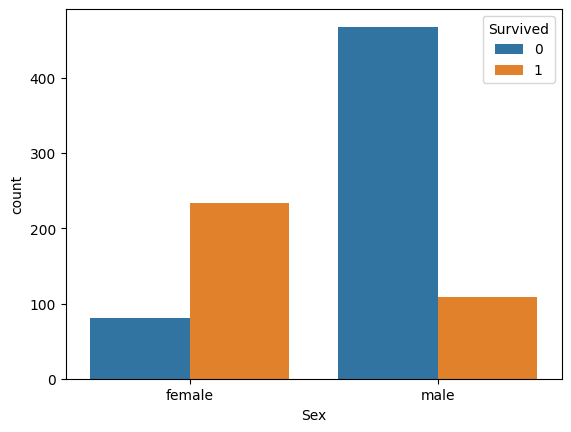

In [96]:
sb.countplot(data = train_df, x= "Sex", hue= "Survived");

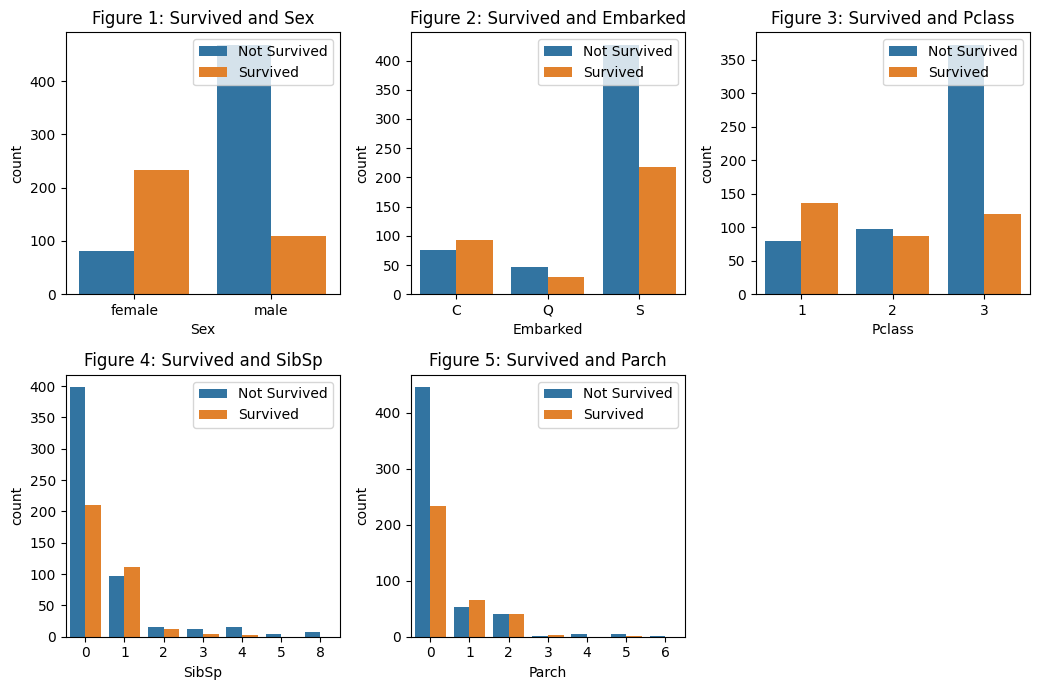

In [121]:
cols = [ 'Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']
n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize= (n_cols*3.5, n_rows*3.5))
for r in range(0, n_rows):
  for c in range(0, n_cols):
    i = r*n_cols+c
    if i < len(cols):
      ax_i = ax[r,c]
      sb.countplot(data = train_df, x=cols[i], hue='Survived', ax= ax_i)
      ax_i.set_title(f"Figure {i+1}: Survived and {cols[i]}")
      ax_i.legend(title= '', loc= 'upper right', labels=['Not Survived','Survived'])
ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

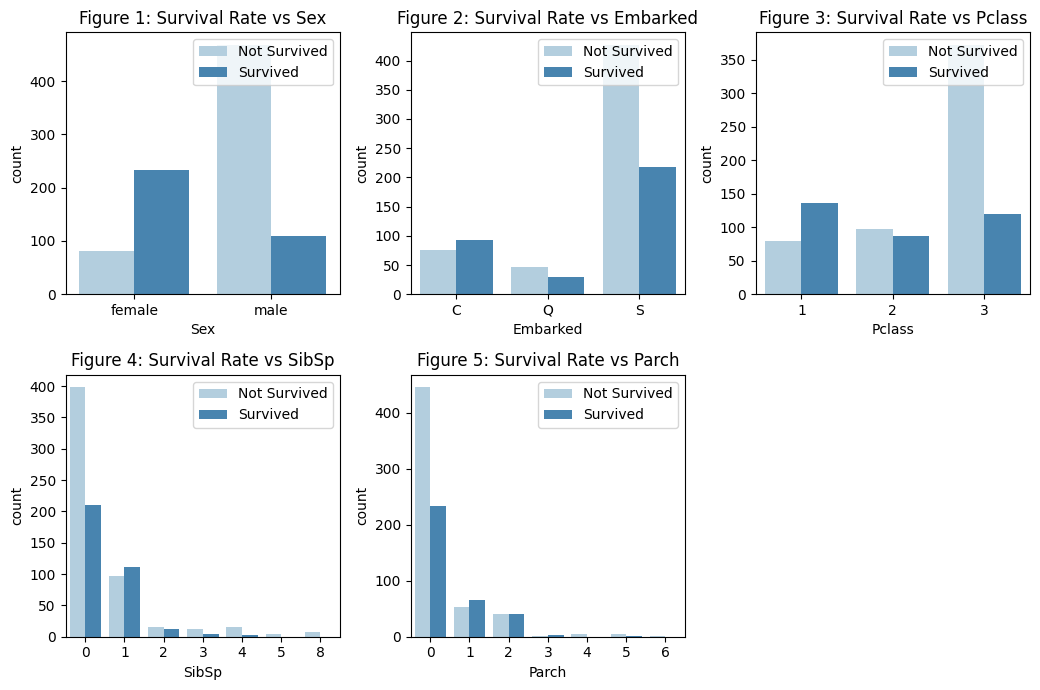

In [107]:
cols = [ 'Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']
n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize= (n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i= r*n_cols + c
        if i < len(cols):
            ax_i= ax[r,c]
            sb.countplot(data=train_df, x=cols[i], hue= "Survived", palette= "Blues", ax =ax_i)
            ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title='', loc= 'upper right', labels=['Not Survived', 'Survived'])
ax.flat[-1].set_visible(False) # Remove the last supplot
plt.tight_layout()
plt.show();

## Observation
- Survival Rate
    - Fig 1: Femle survival rate > male
    - Fig 2: Most people embarked on Southampton, and also had the highest people not survival
    - Fig 3: 1st class higher survival rate
    - Fig 4: People going with 0 SibSp are mostly not survival the numble of passenger with 1-2 family members has a better chance of survival
    - Fig 5: People going with 0 parch are mostly not survival
# 3.2 EDA for Numerical Features
    - Numerical Features: (continuous) age, fare
### Age

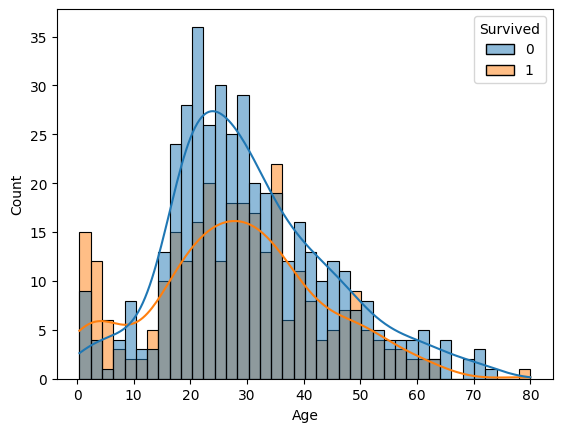

In [29]:
sb.histplot(data= train_df, x='Age',hue= 'Survived', bins=40, kde= True);

### Fare

In [30]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

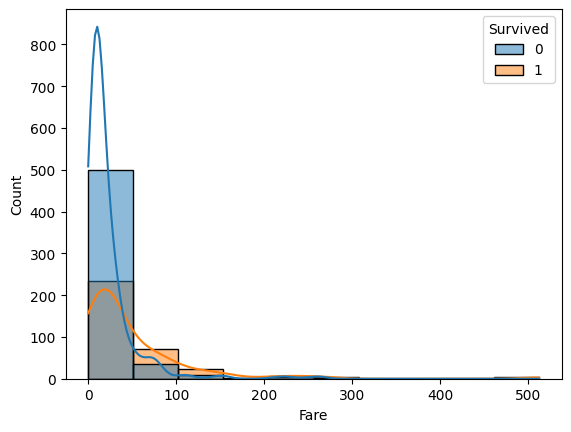

In [31]:
sb.histplot(data= train_df, x='Fare',hue= 'Survived', bins=10, kde= True);

<Axes: xlabel='Fare', ylabel='count'>

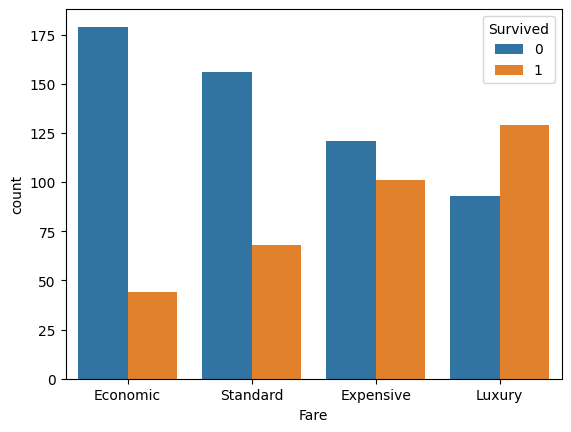

In [32]:
# to name for 0-25% quartile,25-50,50-75,75-100
fare_categories = ['Economic', 'Standard', 'Expensive','Luxury']
quartile_data = pd.qcut(train_df['Fare'], 4, labels = fare_categories)
sb.countplot(x=quartile_data,hue= train_df['Survived'])

In [33]:
train_df['Fare']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

- Distribution of Fare
    + Fare does not follow a normal distribution and has a huge spike at the price range [0-100].
    + The distribution is skewed to the left with 75% of the fare paid under 31 and a max paid fare of 512.
- Quartile plot:
    + Passenger with Luxury & Expensive Fare will have more chance to survive
    
# 4. Feature Engineering & Data Wrangling

 ## name

In [34]:
train_df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [35]:
import re # regular expresssion

def extract_title(name) :
    p= re.compile(r",([\w\s]+)\.")
    # if p.search(name) is None:
    # print(name) kiểm tra dòng nào lỗi k chạy dc
    return p.search(name).groups(1)[0].strip()

train_df['Title']=train_df['Name'].apply(lambda name: extract_title(name))

In [36]:
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [37]:
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

In [38]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [39]:
def group_title(title):
    if title in ['Mr', 'Miss', 'Mrs', 'Master']:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Orther"

train_df['Title']= train_df['Title'].apply(lambda title: group_title(title))
test_df['Title']= test_df['Title'].apply(lambda title: group_title(title))

In [40]:
train_df['Title'].value_counts()

Mr        517
Miss      183
Mrs       125
Master     40
Orther     26
Name: Title, dtype: int64

In [41]:
test_df['Title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Orther      6
Name: Title, dtype: int64

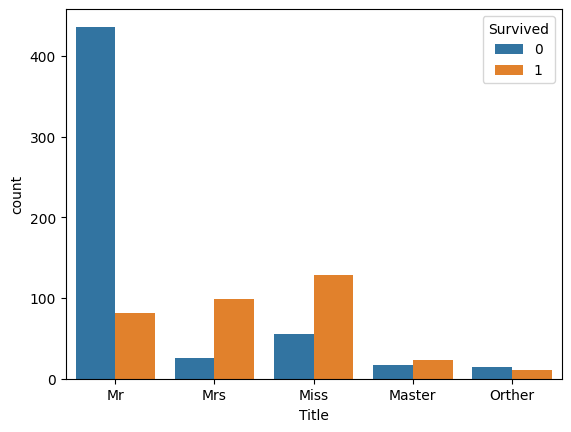

In [42]:
sb.countplot(data=train_df, x='Title', hue= 'Survived');

# Family
 - SibSp , Parch

In [43]:
train_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1

In [44]:
test_df['Family_Size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

In [45]:
train_df['Family_Cat'] = pd.cut(train_df['Family_Size'], bins= [0,1,4,6,20], labels= ['solo','Small', 'Medium','Large']) # (0,1],(1,4],(4,6],(6,10]
test_df['Family_Cat'] = pd.cut(test_df['Family_Size'], bins= [0,1,4,6,20], labels= ['solo','Small', 'Medium','Large'])

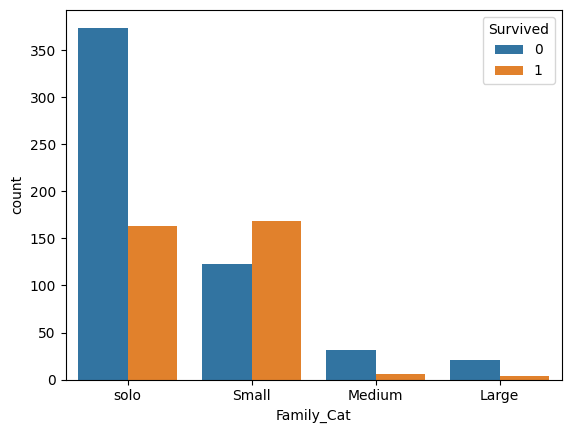

In [46]:
sb.countplot(data= train_df, x='Family_Cat', hue= 'Survived');

# 4.2. Data Wrang

In [47]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [48]:
def display_missing(df, feature_cols):
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"Col {col} has {missing_count} missing values.")

display_missing(train_df, feature_cols)

Col Age has 177 missing values.
Col Embarked has 2 missing values.


In [49]:
# chuyển thành %
def display_missing(df, feature_cols):
    n_row =df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"Col {col} has {missing_count*100/n_row:.2f}% missing values.")

display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Col Age has 19.87% missing values.
Col Embarked has 0.22% missing values.
Col Age has 20.57% missing values.
Col Fare has 0.24% missing values.


## Filling missing values

### Age
- Filling missing values with `median` of whole dataset
    

In [50]:
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass'])['Age'].median()

In [51]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [52]:
# Filling the missing values in Age with the medians of Sex and Pclass groups
train_df['Age'] = train_df.groupby(['Sex','Pclass'],group_keys=False)['Age'].apply(lambda x: x.fillna(x.median()))
test_df['Age'] = test_df.groupby(['Sex','Pclass'],group_keys=False)['Age'].apply(lambda x: x.fillna(x.median()))

In [53]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Col Embarked has 0.22% missing values.
Col Fare has 0.24% missing values.


In [54]:
X= train_df[feature_cols]
y= train_df['Survived']

In [55]:
X_test = test_df[feature_cols]

In [56]:
# preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_trainformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [57]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_trainformer, cat_features)
])

In [58]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [59]:
X = preprocessor.transform(X) # X -> X_train, X_val

In [60]:
X_test = preprocessor.transform(X_test)

# # 5. Model Training

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_val, y_train, y_val = train_test_split( X,y, test_size=0.2)

In [63]:
X_train.shape, X_val.shape

((712, 19), (179, 19))

In [64]:
X_test.shape

(418, 19)

In [65]:
# binary Classification
from sklearn.preprocessing import PolynomialFeatures
# sklearn model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

In [66]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [67]:
log_reg.score(X_val, y_val)

0.8268156424581006

In [68]:
y_pred = log_reg.predict(X_val)

In [69]:
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.7857142857142857, 0.7746478873239436)

In [70]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       108
           1       0.79      0.77      0.78        71

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



- y = ax1 + bx2 +b -> y = ax1^2+ bx1^2 + cx1^2+ bias

In [71]:
poly = PolynomialFeatures(degree=5)
poly_features_X_train = poly.fit_transform(X_train)
poly_features_X_val = poly.transform(X_val)

In [72]:
poly_log_red = LogisticRegression(solver='liblinear', max_iter=1000)
poly_log_red.fit(poly_features_X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [73]:
poly_log_red.score(poly_features_X_val, y_val)

0.8044692737430168

In [74]:
# Decision Tree
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2022)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2022)

In [75]:
decision_tree.score(X_val, y_val)

0.8156424581005587

# 5.1 Cross-validation


In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
log_red_cv = LogisticRegression(solver='liblinear', max_iter=1000)
dt_cv = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2022)

lr_scores = cross_val_score(log_red_cv, X, y, scoring='accuracy', cv = 5)

In [78]:
lr_scores.mean(), lr_scores.std()

(0.826031008725127, 0.020466357172416235)

In [79]:
lr_scores

array([0.83240223, 0.8258427 , 0.79775281, 0.81460674, 0.85955056])

In [80]:
dt_scores = cross_val_score(dt_cv, X, y, scoring='accuracy', cv = 5)

In [81]:
dt_scores

array([0.7877095 , 0.81460674, 0.8258427 , 0.79213483, 0.81460674])

In [82]:
dt_scores.mean(), dt_scores.std()

(0.8069801016885318, 0.014586754299604428)

# 5.2 Bassline Model Comparision

In [84]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
